# 미분과 도함수
  - 함수의 순간 평균값

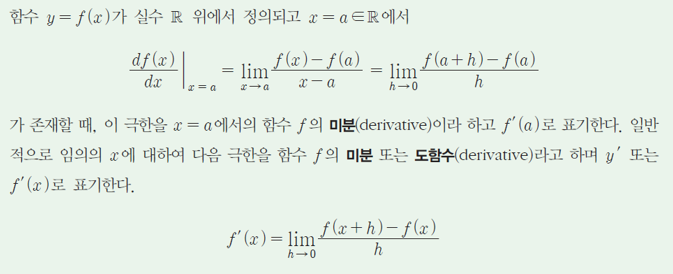

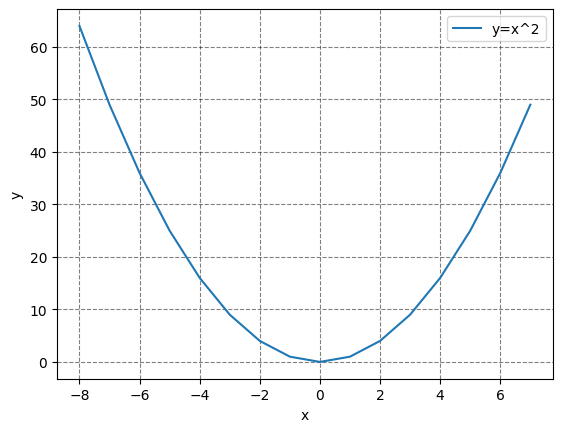

In [2]:
# y = x^2
import matplotlib.pyplot as plt
import numpy as np

x = np.array(range(-8,8))
plt.xlabel('x')
plt.ylabel('y')
plt.grid(color='black', alpha=0.5, linestyle='--')

plt.plot(x, x**2, label='y=x^2')
plt.legend()
plt.show()



In [4]:
import sympy as sp
# 함수 f(x)를 정의
x = sp.symbols('x')
f = sp.exp(x)  # f(x) = e^x

# sympy를 사용해서 f(x),의 미분을 구해
f_prime = sp.diff(f, x)

# 특정 점 a에서의 접선의 기울기
a = 1  # 점 x=1
temp = f_prime.subs(x, a)
print(f"{a}에서 접선의 기울기 : {temp}")
print(x)


1에서 접선의 기울기 : E
x


In [8]:
y = x**2
y_prim = sp.diff(y, x)
y_prim

2*x

In [10]:
# 특정점 a = 1 접선의 기울기
a = 1
y_prim.subs(x, a)

4

In [15]:
import sympy as sp
# 1. 함수 정의  y= x^2
x = sp.symbols('x')
y = x**3 + x**2 + x + 1
# 2. sympy를 이용해서 y의 미분을 구한다
y_prim = sp.diff(y, x)
print(f"함수 y=x^2의 미분 : {y_prim}")
# 3. 특정점 a = 1 접선의 기울기
a = 1
slope_at_a =  y_prim.subs(x, a)
print(f"{a}에서 접선의 기울기 : {slope_at_a}")


함수 y=x^2의 미분 : 3*x**2 + 2*x + 1
1에서 접선의 기울기 : 6


# 머신러닝 > 딥러닝(신경망)
  - 사이킷런 : 기 작성된 모듈을 이용해서 구현 - 데이터만 있으면 됨
  - 파이토치 : 처음부터 구현(사용자 의지대로 구현) - 모델도 구현해야 함(딥러닝)
  - MLOps( 오픈소스)
    - 데이터 정재부터 모델선택 및 결과.. 자동으로 해결
    - 파이프라인 형식으로 구현
  - 도커 & 쿠버네티스로 구현. .배포 및 관리가 편하다.

데이터수집 -> 데이터 전처리 -> 훈련/테스트 데이터 분할 -> 모델구축&학습-> 모델평가 -> 실제 데이터에 대한 분석 결과 도출

평가지표

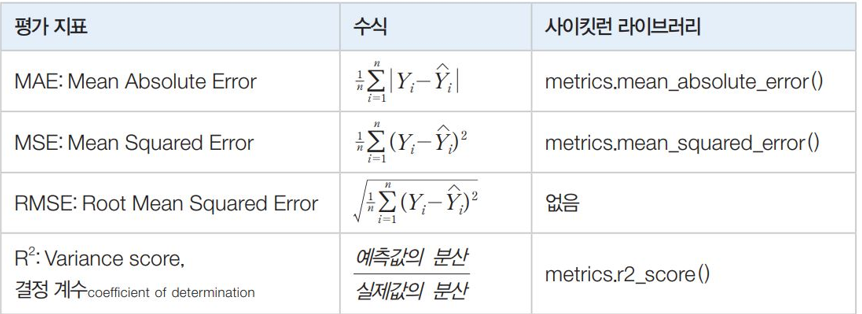

# 데이터 수집

In [16]:
from sklearn import datasets

In [18]:
datasets.load_boston()  # `load_boston` has been removed from scikit-learn since version 1.2.

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [23]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [24]:
data.shape, target.shape

((506, 13), (506,))

In [25]:
'''
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''
feature_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
boston_df = pd.DataFrame(data, columns=feature_name)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
boston_df['PRICE'] = target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
print(f'boston data set shape: {boston_df.shape}')

boston data set shape: (506, 14)


In [29]:
# 데이터의 결측치 존재여부와 타입
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


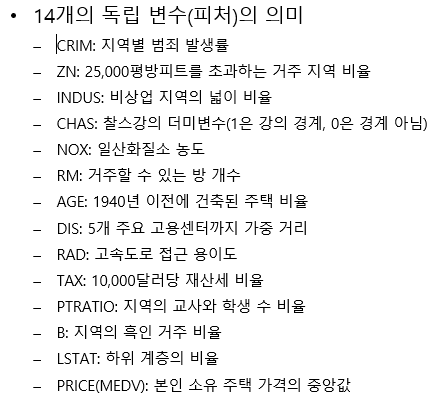

선형회귀
  - 장점
    - 빠르게 모델을 만들고 구조가 간단해서 학습속도가 빠르다
  - 단점
    - 직선의 방정식... 을 생각하면.. 정확하지 않을수 있다.

In [30]:
from sklearn.linear_model import LinearRegression  # 대표적인 사이킷런의 서형 모델
from sklearn.model_selection import train_test_split  # 데이터 분할
from sklearn.metrics import mean_squared_error, r2_score  # 평가도구  , 평균제곱오차, 결정계수(분산)

In [36]:
# 데이터분할  - 잘 섞어서 즉 특성이 골고루 가게끔.. 그 다음 적당한 비율로 분리(8:2, 7.5:2.5)
train_df, test_df =  train_test_split(boston_df, test_size=0.3,random_state=100)
train_df.shape,  test_df.shape

((354, 14), (152, 14))

In [37]:
# X, y를 분리해서 적용
X = boston_df.iloc[:,:-1]
y = boston_df.iloc[:,-1]
x_train,x_test,y_train,y_test =  train_test_split(X,y, test_size=0.3,random_state=100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

# 모델을 선정하고 학습 하고 평가

In [38]:
lr = LinearRegression()  # 모델 객체를 생성

In [39]:
# 학습
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
# 예측  테스트용 데이터
y_predict = lr.predict(x_test)

In [52]:
y_test.iloc[-1], y_predict[-1]

(46.0, 39.673768234095235)

In [54]:
# 평가
mse = mean_squared_error(y_test,y_predict)
mse

29.798844301478777

In [56]:
import numpy as np
rmse = np.sqrt(mse)
rmse

5.458831770761834

In [57]:
r2 = r2_score(y_test,y_predict)
r2

0.7057919873264544

In [ ]:
# r2 = 1  완벽
# r2 = 0  꽝 모델의 설명력이 없음  예측불가
# r2 < 0 실제값의 평균보다 나쁜 예측... 모델의 성능이 극히 낮다

In [60]:
print(f'y 절편 값 : {lr.intercept_}')
print(f'회귀 계수 값 : {np.round(lr.coef_,2)}')

y 절편 값 : 33.11584094298612
회귀 계수 값 : [-8.000e-02  4.000e-02 -1.000e-02  2.630e+00 -1.314e+01  3.840e+00
 -1.000e-02 -1.380e+00  2.800e-01 -1.000e-02 -9.200e-01  1.000e-02
 -4.400e-01]


In [63]:
coef = pd.Series(np.round(lr.coef_,2), index=X.columns)
coef.sort_values(ascending=False)

RM          3.84
CHAS        2.63
RAD         0.28
ZN          0.04
B           0.01
INDUS      -0.01
AGE        -0.01
TAX        -0.01
CRIM       -0.08
LSTAT      -0.44
PTRATIO    -0.92
DIS        -1.38
NOX       -13.14
dtype: float64

In [67]:
x_test.iloc[0], y_predict[0]

(CRIM         0.03768
 ZN          80.00000
 INDUS        1.52000
 CHAS         0.00000
 NOX          0.40400
 RM           7.27400
 AGE         38.30000
 DIS          7.30900
 RAD          2.00000
 TAX        329.00000
 PTRATIO     12.60000
 B          392.20000
 LSTAT        6.62000
 Name: 198, dtype: float64,
 34.016513189867325)

# 분석결과를 시각화

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

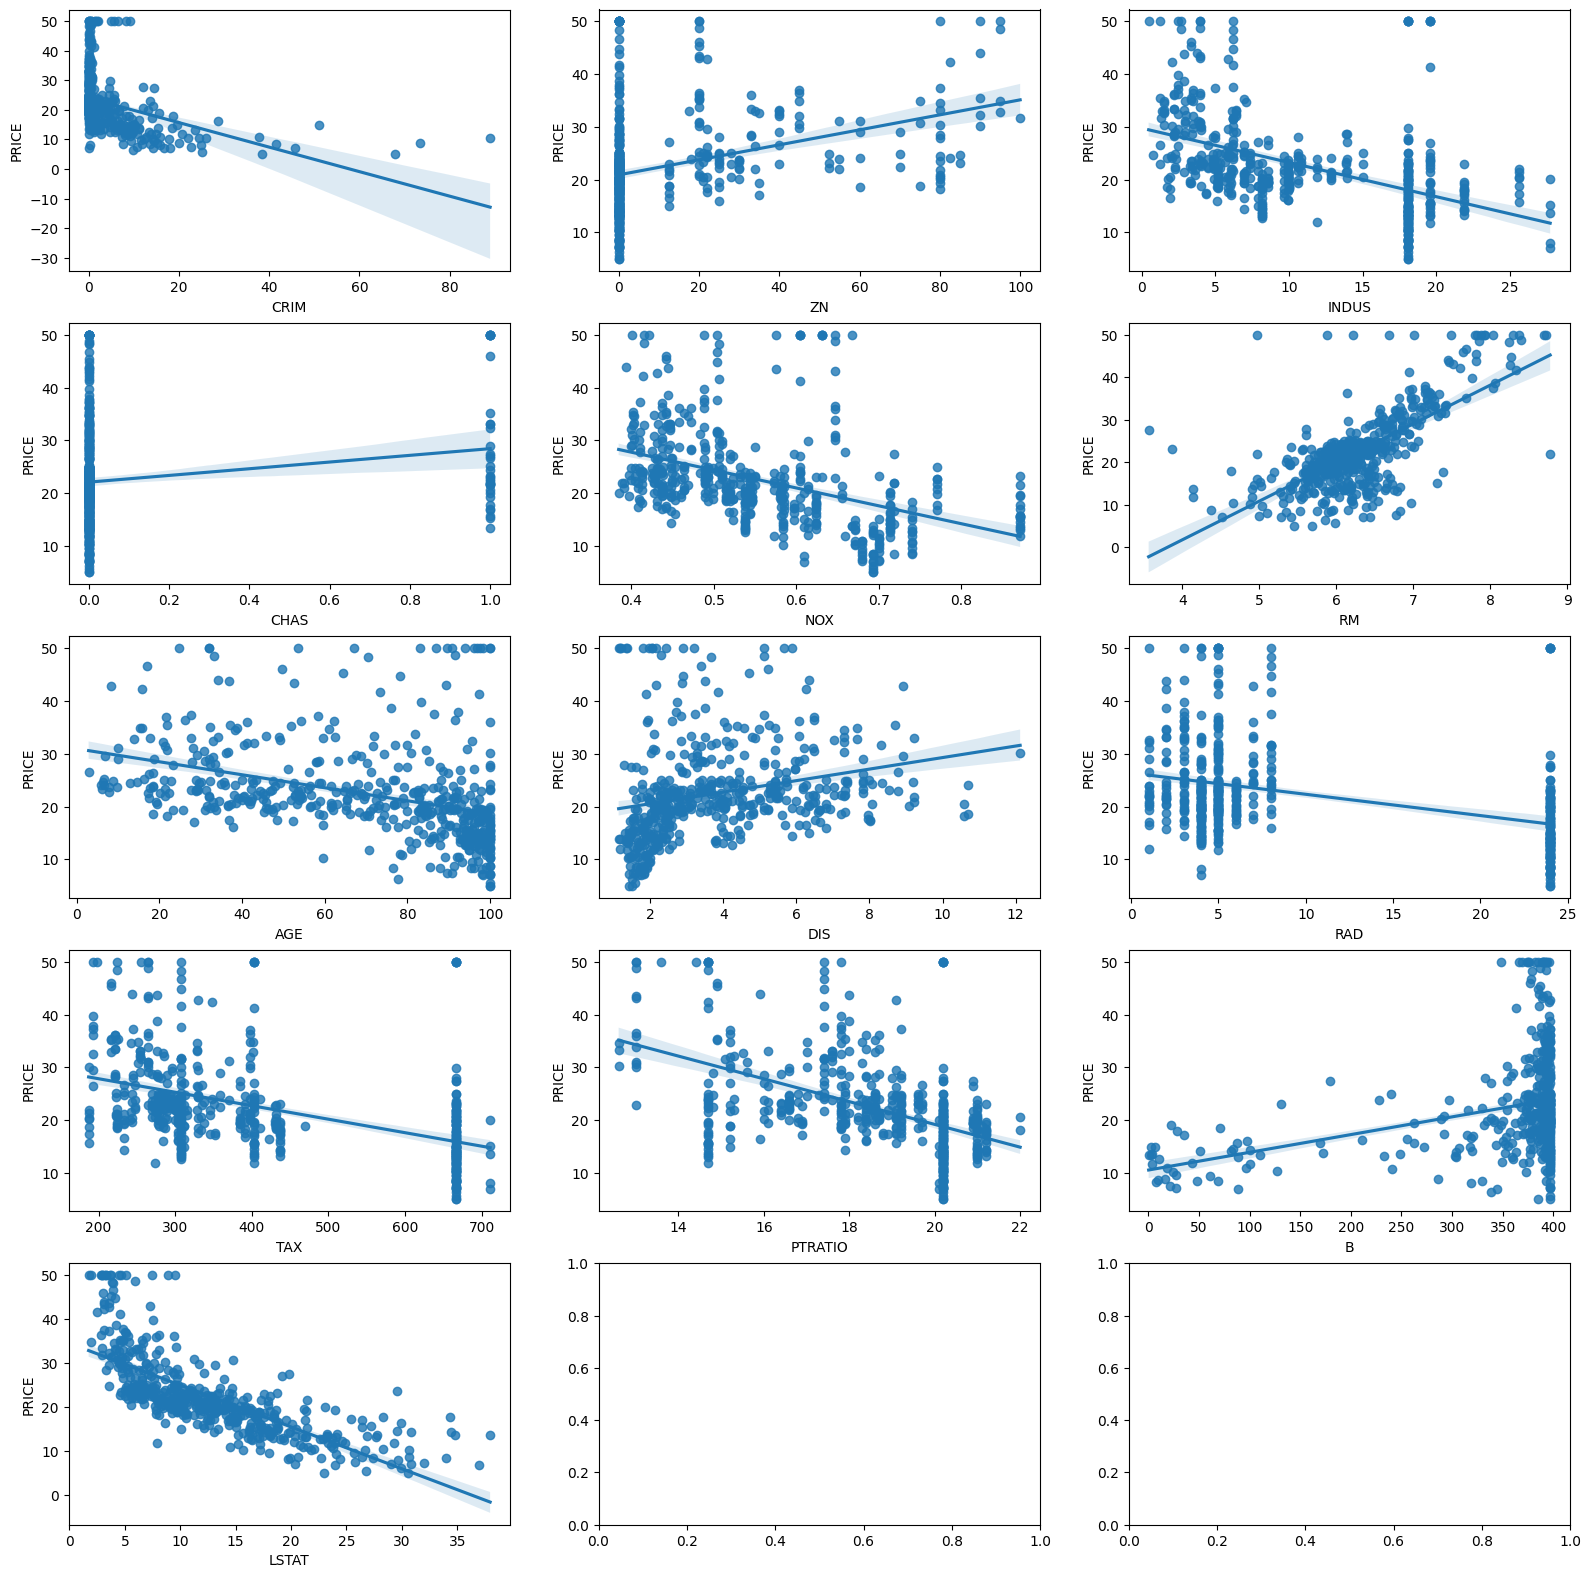

In [75]:
fig,axs =  plt.subplots(figsize=(16,16), nrows=5, ncols=3)
plt.tight_layout(pad=2.0)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
for i, feature in enumerate(feature_name):
  row = int(i/3)
  col = i%3
  # print(row,col)
  sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])

https://archive.ics.uci.edu/dataset/9/auto+mpg

In [76]:
!pip install ucimlrepo

In [77]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [87]:
auto_mpg.variables

,name,role,type,demographic,description,units,missing_values
0,displacement,Feature,Continuous,None,None,None,no
1,mpg,Target,Continuous,None,None,None,no
2,cylinders,Feature,Integer,None,None,None,no
3,horsepower,Feature,Continuous,None,None,None,yes
4,weight,Feature,Continuous,None,None,None,no
5,acceleration,Feature,Continuous,None,None,None,no
6,model_year,Feature,Integer,None,None,None,no
7,origin,Feature,Integer,None,None,None,no
8,car_name,ID,Categorical,None,None,None,no


<Axes: >

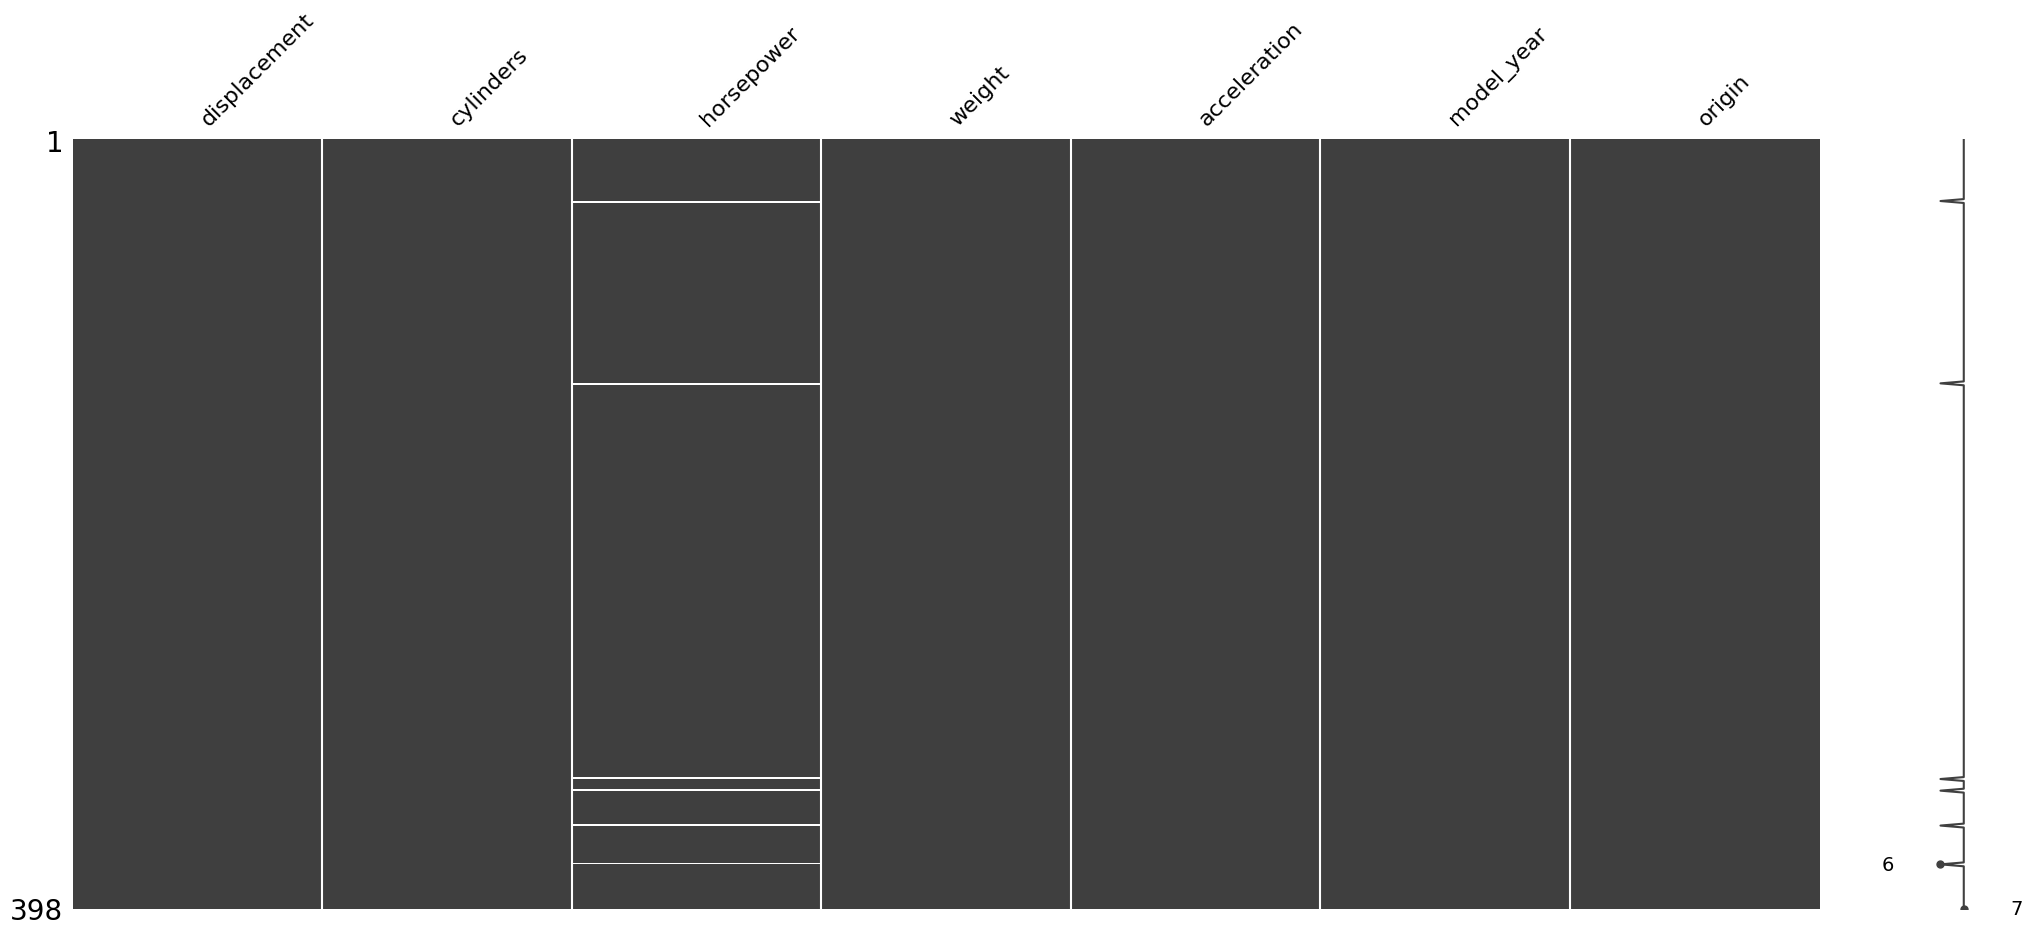

In [95]:
import missingno as msno
msno.matrix(X)